# Pre-processamento dos Dados
## Origem dos dados
Esses dados foram coletados da API pública do The MovieDB, um portal para uma base de dados de filmes e séries de TV onde os usuários podem deixar avaliações e comentários sobre os títulos. O critério para a escolha foi dentre os 2000 títulos mais populares, aqueles que tiveram pelo menos uma avaliação feita por algum usuário.
## Objetivo
Neste notebook vamos fazer alguns tratamentos com os dados coletados para prepará-los para utilização com as técnicas de clustering, além de tentar extrair alguns insights.

In [85]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

In [86]:
tv_shows_df = pd.read_csv('./tv_shows.csv')

tv_shows_df.head()

,Unnamed: 0,tv_show,genres,id
0,0,Invincible,"[16, 10759, 18, 10765]",95557
1,1,The Flash,"[18, 10765]",60735
2,2,The Good Doctor,[18],71712
3,3,The Handmaid's Tale,"[10765, 18]",69478
4,4,Grey's Anatomy,[18],1416


In [87]:
tv_shows_df.describe()

,Unnamed: 0,id
count,244.000000,244.000000
mean,121.500000,51443.987705
std,70.580923,32873.805279
min,0.000000,95.000000
25%,60.750000,13133.500000
50%,121.500000,62765.500000
75%,182.250000,74434.500000
max,243.000000,111625.000000


In [88]:
import json
tv_shows_df['genres'] = tv_shows_df['genres'].apply(lambda genres: json.loads(genres))

mlb = MultiLabelBinarizer()
genres_df = pd.DataFrame(mlb.fit_transform(tv_shows_df['genres']),columns=mlb.classes_)
tv_shows_genres_df = tv_shows_df.join(genres_df)
tv_shows_genres_df

,Unnamed: 0,tv_show,genres,id,16,18,35,37,80,878,9648,10751,10759,10762,10763,10764,10765,10766,10767,10768
0,0,Invincible,"[16, 10759, 18, 10765]",95557,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,The Flash,"[18, 10765]",60735,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,The Good Doctor,[18],71712,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,The Handmaid's Tale,"[10765, 18]",69478,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4,Grey's Anatomy,[18],1416,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,Knightfall,"[10759, 18]",73117,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
240,240,The Outsider,"[9648, 18, 80]",84661,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
241,241,The Ren & Stimpy Show,"[16, 10765, 35]",504,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
242,242,NYPD Blue,[18],194,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Gêneros
O gráfico abaixo representa os gêneros com maior ocorrência no dataset de séries, ou seja, categorias de séries que engloba mais títulos. Os 3 gêneros com mais ocorrências são 18, 10765 e 10759, IDs de Drama, Ficção Científica e Ação e Aventura. Portanto, certamente as séries recomendadas vão cair dentro de um ou mais de um desses grupos.

<AxesSubplot:>

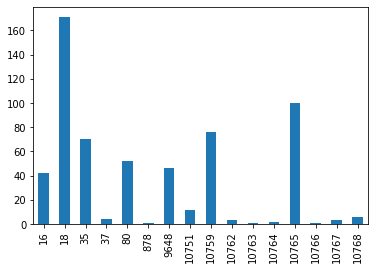

In [89]:
genres_df.sum().plot.bar()

In [90]:
reviews_df = pd.read_csv('./reviews.csv')

reviews_df

,Unnamed: 0,user,tv_show,rating,id
0,0,ChrisSawin,Invincible,10.0,6058917c5c071b00546ccab3
1,1,Tanasia,The Flash,NaN,5f98b89877e1f600358ada9f
2,2,BruhDev,The Flash,NaN,605e5e40d2f5b500286aa8ed
3,3,drtvnut89,The Good Doctor,10.0,5a0a07c192514131210073ec
4,4,Rangan,The Handmaid's Tale,NaN,59bd8f6b92514135510185ab
...,...,...,...,...,...
366,366,Kewl_Kat,The Outsider,5.0,5e66a0a68d52c9001d3f9200
367,367,Star Lord,The Ren & Stimpy Show,8.0,58c104909251417327004598
368,368,danny700,The Ren & Stimpy Show,NaN,590a8b6b9251414fbe009e72
369,369,Bazzjazz,NYPD Blue,10.0,5acfe928c3a36842ca00354c


In [91]:
reviews_tvshows_df = pd.merge( tv_shows_genres_df, reviews_df, how="right", on=["tv_show"])
reviews_tvshows_df.isnull().sum()

Unnamed: 0_x     0
tv_show          0
genres           0
id_x             0
16               0
18               0
35               0
37               0
80               0
878              0
9648             0
10751            0
10759            0
10762            0
10763            0
10764            0
10765            0
10766            0
10767            0
10768            0
Unnamed: 0_y     0
user             0
rating          75
id_y             0
dtype: int64

In [92]:
reviews_tvshows_df['rating'] = reviews_tvshows_df['rating'].fillna(value=reviews_tvshows_df['rating'].mean())
reviews_tvshows_df

,Unnamed: 0_x,tv_show,genres,id_x,16,18,35,37,80,878,...,10763,10764,10765,10766,10767,10768,Unnamed: 0_y,user,rating,id_y
0,0,Invincible,"[16, 10759, 18, 10765]",95557,1,1,0,0,0,0,...,0,0,1,0,0,0,0,ChrisSawin,10.00000,6058917c5c071b00546ccab3
1,1,The Flash,"[18, 10765]",60735,0,1,0,0,0,0,...,0,0,1,0,0,0,1,Tanasia,7.61794,5f98b89877e1f600358ada9f
2,1,The Flash,"[18, 10765]",60735,0,1,0,0,0,0,...,0,0,1,0,0,0,2,BruhDev,7.61794,605e5e40d2f5b500286aa8ed
3,2,The Good Doctor,[18],71712,0,1,0,0,0,0,...,0,0,0,0,0,0,3,drtvnut89,10.00000,5a0a07c192514131210073ec
4,3,The Handmaid's Tale,"[10765, 18]",69478,0,1,0,0,0,0,...,0,0,1,0,0,0,4,Rangan,7.61794,59bd8f6b92514135510185ab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,240,The Outsider,"[9648, 18, 80]",84661,0,1,0,0,1,0,...,0,0,0,0,0,0,366,Kewl_Kat,5.00000,5e66a0a68d52c9001d3f9200
372,241,The Ren & Stimpy Show,"[16, 10765, 35]",504,1,0,1,0,0,0,...,0,0,1,0,0,0,367,Star Lord,8.00000,58c104909251417327004598
373,241,The Ren & Stimpy Show,"[16, 10765, 35]",504,1,0,1,0,0,0,...,0,0,1,0,0,0,368,danny700,7.61794,590a8b6b9251414fbe009e72
374,242,NYPD Blue,[18],194,0,1,0,0,0,0,...,0,0,0,0,0,0,369,Bazzjazz,10.00000,5acfe928c3a36842ca00354c


## Distribuição das Notas
Abaixo temos uma distribuição das notas concedidas pelos usuários aos títulos. Temos uma concentração bem maior em números mais altos, o que não deve ser um problema, pois as notas foram concedidas por usuários diferentes.

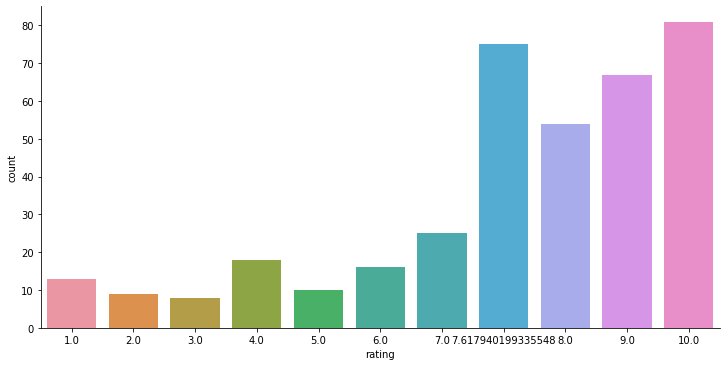

In [93]:
sns.catplot(kind='count', data=reviews_tvshows_df, x='rating', height=5, aspect=2)

## Matriz de correlação
A matriz de correlação abaixo leva em conta apenas as notas (ratings) e os generos. O objetivo era justamente verificar se há algum genero que influencie positiva ou negativamente nas notas dadas pelos usuários, mas constata-se que não. Algo que pode ser extraído dessa visualização é os generos que tem mais ou menos probabilidade de aparecerem juntos em um mesmo filme, Drama e comédia (18 e 35) ou Drama e animação (18 e 16) por exemplo, tendem a não aparecerem juntos (baixa correlação).

<AxesSubplot:>

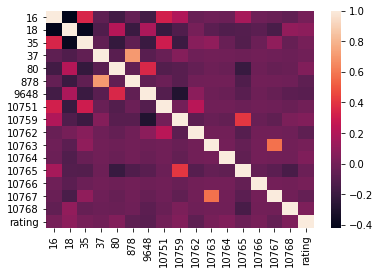

In [94]:
sns.heatmap(reviews_tvshows_df.drop(['genres', 'id_x', 'id_y', 'user', 'Unnamed: 0_x', 'Unnamed: 0_y'], axis=1).corr())

In [95]:
reviews_tvshows_df.drop(['genres', 'id_x', 'Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)
reviews_tvshows_df

,tv_show,16,18,35,37,80,878,9648,10751,10759,10762,10763,10764,10765,10766,10767,10768,user,rating,id_y
0,Invincible,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,ChrisSawin,10.00000,6058917c5c071b00546ccab3
1,The Flash,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Tanasia,7.61794,5f98b89877e1f600358ada9f
2,The Flash,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,BruhDev,7.61794,605e5e40d2f5b500286aa8ed
3,The Good Doctor,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,drtvnut89,10.00000,5a0a07c192514131210073ec
4,The Handmaid's Tale,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Rangan,7.61794,59bd8f6b92514135510185ab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,The Outsider,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,Kewl_Kat,5.00000,5e66a0a68d52c9001d3f9200
372,The Ren & Stimpy Show,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,Star Lord,8.00000,58c104909251417327004598
373,The Ren & Stimpy Show,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,danny700,7.61794,590a8b6b9251414fbe009e72
374,NYPD Blue,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Bazzjazz,10.00000,5acfe928c3a36842ca00354c


In [96]:
reviews_tvshows_df.to_csv('./reviews_tv_shows.csv')